In [34]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from HW2_util import ModuleParams as MyParam, TwoLayerReluClassificationModel as MyReluModel, MyNNTrainer as MyTrainer
import torch.nn.functional as F
from dataclasses import dataclass

# # a = np.array([[1,2,3],[3,2,4]])
# a = np.mat([[1,2],[3,3]])
# a_tensor = torch.tensor([[1,2],[3,3]])
# # b = np.array([[0,5], [2,6], [3,2]])
# b = np.mat([[1], [3]])
# b_tensor = torch.tensor([[1], [3]])
# # d = np.array([[13,23],[16,35]])
# d = np.mat([[7],[12]])
# d_tensor = torch.tensor([[13],[16]])
# 
# c = a@b
# # e, _, _, _ = np.linalg.lstsq(d, a)
# e = np.round(a.I@d).astype(int)
# f = a.I@d
# 
# # e_tensor = a_tensor.inverse()
# 
# print(f)


number_data = 30  # number of points
y_start, y_stop = 0.0, 5.0
x_data_2c = np.sort(np.random.rand(number_data))
x_data_2c_tensor = torch.as_tensor(x_data_2c, dtype=float)
y_data_2c = (y_stop-y_start)*np.random.rand(number_data) + y_start
y_data_2c_tensor = torch.as_tensor(y_data_2c)
y_data_2c_tensor = y_data_2c_tensor.float().view(number_data,1)
training_data_ex2c = TensorDataset(x_data_2c_tensor, y_data_2c_tensor)

def find_params(x, y):
    w1 = [1.0 for i in x]
    b1 = [-i for i in x]
    b2 = y[0]
    w1_mat, b1_mat = np.mat(w1), np.mat(b1).T
    b1_mat_repeat = np.repeat(b1_mat, len(x), axis=1)
    x_mat, y_mat = np.mat(x), np.mat(y)
    z_mat = w1_mat.T@x_mat
    z_mat += b1_mat_repeat
    z_mat_relu = np.mat(np.where(z_mat<0, 0, z_mat)).T
    y_b = (y_mat-b2).T
    # w2_mat = z_mat_relu.I@y_b
    w2_mat = np.linalg.pinv(z_mat_relu)@y_b
    # w2_mat = np.mat(z_mat_relu)
    w2 = np.asarray(w2_mat)
    # w2 = [0]
    # for i in range(1,len(x)):
    #     x_w = 0
    #     if i >= 2:
    #         x_w_list = [(x[i] - x[j])*w2[j] for j in range(i-2)]
    #         x_w = sum(x_w_list)
    #     w2.append((y[i] - b2 - x_w)/(x[i]-x[i-1]))
    
    return w1, b1, w2, b2

print(x_data_2c)
print(y_data_2c)
w1, b1, w2, b2 = find_params(x_data_2c, y_data_2c)
print(w1, b1, w2, b2)


[0.00557435 0.01587808 0.02839761 0.05318735 0.09546326 0.12308336
 0.18880738 0.21829889 0.31017872 0.31254726 0.34912918 0.35353221
 0.35534057 0.43086683 0.45474412 0.45996944 0.46176484 0.59696149
 0.5982452  0.63460014 0.65800078 0.67226893 0.70105901 0.75613169
 0.77325621 0.78128208 0.78507859 0.82662829 0.87287    0.98272288]
[2.83024702 0.58069405 1.66974957 3.77225204 3.30101471 0.80550139
 4.81834752 0.15954414 3.48801982 3.02990581 0.49943382 1.91127225
 4.28285272 3.9822568  1.07058614 1.76988357 1.77034649 4.49594581
 0.63639963 1.64733652 2.36071394 1.46889043 1.31385169 2.93333934
 2.54905314 2.82750293 1.69172222 2.92857025 4.69889728 4.74904044]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [-0.005574350527479122, -0.015878076767797067, -0.028397609032367543, -0.05318734703757999, -0.0954632629638843, -0.12308336239177708, -0.18880738455123358, -0.21829889312794548

In [33]:
score_list = []
error_list = []
for i in range(number_data):
    z = [max(0, x_data_2c[i]+b1[j]) for j in range(number_data)]
    score = sum([z[j]*w2[j] for j in range(number_data)]) + b2
    score_list.append(score)
    error = float(score - y_data_2c[i])
    error_list.append(error)
    print(f'{error:.4f}')

0.0000
-0.0000
-0.0000
0.0000
-0.0000
-0.0000
0.0000
-0.0000
-0.0000
0.0000
-0.0000
-0.0000
0.0000
0.0000
-0.0000
-0.0000
0.0000
0.0000
0.0000
-0.0000
-0.0000
-0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000


In [35]:
@dataclass
class ParamEx2c(MyParam):
    weight_1 = torch.tensor(w1)
    bias_1 = torch.tensor(b1)
    weight_2 = torch.tensor(w2)
    bias_2 = torch.tensor(b2)

params_ex2c = ParamEx2c(linear_in_features=1, linear_hidden_features=number_data, 
                      linear_out_features=1, optimizer='SGD', learning_rate=0.001, 
                      batch_size=10, num_epoch=5,
                      loss_function='MSE')


class TwoLayerApproxiModel(nn.Module):
    def __init__(self, model_params: MyParam):
        self._in_feature = model_params.linear_in_features
        self._hidden_neurons = model_params.linear_hidden_features
        self._out_feature = model_params.linear_out_features
        super(TwoLayerApproxiModel, self).__init__()
        self._layer_1 = nn.Linear(self._in_feature, self._hidden_neurons)
        self._layer_1.weight.data = model_params.weight_1
        self._layer_1.bias.data = model_params.bias_1
        self._layer_2 = nn.Linear(self._hidden_neurons, self._out_feature)
        self._layer_2.weight.data = model_params.weight_2
        self._layer_2.bias.data = model_params.bias_2
        self._model = nn.Sequential(self._layer_1,
                                    nn.ReLU(),
                                    self._layer_2)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        z = self._model(x)
        return z

model_ex2c = TwoLayerApproxiModel(params_ex2c)
y_hat = model_ex2c(x_data_2c_tensor)
# y_hat = model_ex2c(torch.tensor([0.01798932]))
print(y_hat)

# trainer_ex2c = MyTrainer(model=TwoLayerApproxiModel, 
#                          model_params=params_ex2c, 
#                          training_set=training_data_ex2c)
# df_ex2c = trainer_ex2c.result

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

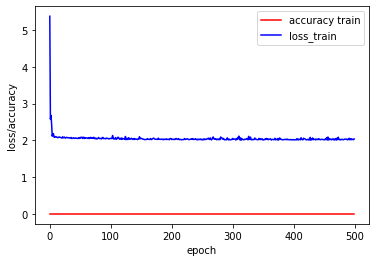

In [6]:
# from HW2_util import plot_loss_accuracy
# 
# # plot_loss_accuracy(df_ex2c, include_test=False)